# DATA INGESTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df1  =pd.read_csv("annex1.csv")
df2 = pd.read_csv("annex2.csv")
df3 = pd.read_csv("annex3.csv")
df4 = pd.read_csv("annex4.csv")
print(df1.head())
print("--------------------------------------------------------------------")
print(df2.head())
print("--------------------------------------------------------------------------")
print(df3.head())
print("--------------------------------------------------------------------------")
print(df4.head())

         Item Code              Item Name  Category Code  \
0  102900005115168       Niushou Shengcai     1011010101   
1  102900005115199      Sichuan Red Cedar     1011010101   
2  102900005115625  Local Xiaomao Cabbage     1011010101   
3  102900005115748           White Caitai     1011010101   
4  102900005115762               Amaranth     1011010101   

            Category Name  
0  Flower/Leaf Vegetables  
1  Flower/Leaf Vegetables  
2  Flower/Leaf Vegetables  
3  Flower/Leaf Vegetables  
4  Flower/Leaf Vegetables  
--------------------------------------------------------------------
         Date          Time        Item Code  Quantity Sold (kilo)  \
0  2020-07-01  09:15:07.924  102900005117056                 0.396   
1  2020-07-01  09:17:27.295  102900005115960                 0.849   
2  2020-07-01  09:17:33.905  102900005117056                 0.409   
3  2020-07-01  09:19:45.450  102900005115823                 0.421   
4  2020-07-01  09:20:23.686  102900005115908        

In [10]:
df1.isna().sum()
df2.isna().sum()
df3.isna().sum()
df4.isna().sum()


Item Code        0
Item Name        0
Loss Rate (%)    0
dtype: int64

In [11]:
df1.duplicated().sum()
df2.duplicated().sum()
df3.duplicated().sum()
df4.duplicated().sum()


np.int64(0)

In [13]:
df1.info()
print("----------------------------------------------------------------------------")
df2.info()
print("----------------------------------------------------------------------------")
df3.info()
print("----------------------------------------------------------------------------")
df4.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Item Code      251 non-null    int64 
 1   Item Name      251 non-null    object
 2   Category Code  251 non-null    int64 
 3   Category Name  251 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.0+ KB
----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878503 entries, 0 to 878502
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Date                         878503 non-null  object 
 1   Time                         878503 non-null  object 
 2   Item Code                    878503 non-null  int64  
 3   Quantity Sold (kilo)         878503 non-null  float64
 4   Unit Selling Price (RMB/kg)  878503 non-nu

In [14]:
df1['Item Name'] = df1['Item Name'].str.strip()
df1['Category Name'] = df1['Category Name'].str.strip()


In [15]:
df2['Date'] = pd.to_datetime(df2['Date'])


In [16]:
df2['Time'] = pd.to_datetime(df2['Time']).dt.time


C:\Users\ankit\AppData\Local\Temp\ipykernel_21000\2162016278.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['Time'] = pd.to_datetime(df2['Time']).dt.time


In [17]:
df2['Sale or Return'] = df2['Sale or Return'].str.strip().str.upper()
df2['Discount (Yes/No)'] = df2['Discount (Yes/No)'].str.strip().str.upper()


In [18]:
df3['Date'] = pd.to_datetime(df3['Date'])


In [19]:
df4['Item Name'] = df4['Item Name'].str.strip()


In [20]:
merged1 = df2.merge(df1, on='Item Code', how='left')


In [21]:
merged2 = merged1.merge(df3, on=['Date', 'Item Code'], how='left')


In [22]:
final_master = merged2.merge(df4[['Item Code', 'Loss Rate (%)']], on='Item Code', how='left')


In [23]:
final_master.to_csv("master_dataset.csv", index=False)


In [41]:
df = pd.read_csv("master_dataset.csv")
df.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name,Category Code,Category Name,Wholesale Price (RMB/kg),Loss Rate (%)
0,2020-07-01,09:15:07.924000,102900005117056,0.396,7.6,SALE,NO,Paopaojiao (Jingpin),1011010504,Capsicum,4.32,7.08
1,2020-07-01,09:17:27.295000,102900005115960,0.849,3.2,SALE,NO,Chinese Cabbage,1011010101,Flower/Leaf Vegetables,2.10,22.27
2,2020-07-01,09:17:33.905000,102900005117056,0.409,7.6,SALE,NO,Paopaojiao (Jingpin),1011010504,Capsicum,4.32,7.08
3,2020-07-01,09:19:45.450000,102900005115823,0.421,10.0,SALE,NO,Shanghaiqing,1011010101,Flower/Leaf Vegetables,7.03,14.43
4,2020-07-01,09:20:23.686000,102900005115908,0.539,8.0,SALE,NO,Caixin,1011010101,Flower/Leaf Vegetables,4.60,13.70


In [28]:
df.info()
df.head()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878503 entries, 0 to 878502
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Date                         878503 non-null  object 
 1   Time                         878503 non-null  object 
 2   Item Code                    878503 non-null  int64  
 3   Quantity Sold (kilo)         878503 non-null  float64
 4   Unit Selling Price (RMB/kg)  878503 non-null  float64
 5   Sale or Return               878503 non-null  object 
 6   Discount (Yes/No)            878503 non-null  object 
 7   Item Name                    878503 non-null  object 
 8   Category Code                878503 non-null  int64  
 9   Category Name                878503 non-null  object 
 10  Wholesale Price (RMB/kg)     878503 non-null  float64
 11  Loss Rate (%)                878503 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 80.4+ MB


,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Category Code,Wholesale Price (RMB/kg),Loss Rate (%)
count,8.785030e+05,878503.000000,878503.000000,8.785030e+05,878503.000000,878503.000000
mean,1.030313e+14,0.536112,8.917144,1.011010e+09,5.663150,10.122526
std,7.174368e+11,0.400087,6.311265,2.582929e+02,4.229638,4.741439
min,1.029000e+14,-9.082000,0.100000,1.011010e+09,0.010000,0.000000
25%,1.029000e+14,0.290000,4.900000,1.011010e+09,3.000000,6.270000
50%,1.029000e+14,0.435000,7.900000,1.011010e+09,4.690000,9.430000
75%,1.029000e+14,0.742000,10.800000,1.011011e+09,7.010000,13.620000
max,1.069740e+14,160.000000,119.900000,1.011011e+09,141.000000,29.250000


In [35]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [36]:
df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.time


In [37]:
num_cols = [
    'Quantity Sold (kilo)',
    'Unit Selling Price (RMB/kg)',
    'Wholesale Price (RMB/kg)',
    'Loss Rate (%)'
]

df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

In [42]:
df.isnull().sum()


Date                           0
Time                           0
Item Code                      0
Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Sale or Return                 0
Discount (Yes/No)              0
Item Name                      0
Category Code                  0
Category Name                  0
Wholesale Price (RMB/kg)       0
Loss Rate (%)                  0
dtype: int64

In [44]:
df['Time'].value_counts().head()


Time
10:05:12.655000    6
09:37:24.655000    5
18:18:35.264000    5
09:34:10.530000    5
18:11:43.061000    4
Name: count, dtype: int64

In [43]:
df['Time'] = df['Time'].fillna("Unknown")


In [46]:
import pandas as pd
import numpy as np

# ======================================================
# 1. LOAD MERGED DATA
# ======================================================
df = pd.read_csv("master_dataset.csv")

print("Initial shape:", df.shape)
print(df.isnull().sum())
print(df.head())

# ======================================================
# 2. HANDLE DATE COLUMN
# ======================================================
# Convert Date to proper datetime
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")

# Extract useful date features
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Weekday"] = df["Date"].dt.day_name()

# Drop rows where Date could not be parsed
df = df.dropna(subset=["Date"])

# ======================================================
# 3. HANDLE TIME COLUMN (NO ERROR, NO WARNING)
# ======================================================
# Try the most common format: HH:MM:SS or HH:MM
def parse_time(t):
    for fmt in ("%H:%M:%S", "%H:%M"):
        try:
            return pd.to_datetime(t, format=fmt).time()
        except:
            continue
    return np.nan

df["Time"] = df["Time"].apply(parse_time)

# Keep Time — as you said
# Extract hour for analysis
df["Hour"] = df["Time"].apply(lambda x: x.hour if pd.notnull(x) else np.nan)

# ======================================================
# 4. HANDLE NULL VALUES
# ======================================================
# Numeric columns → fill with median
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical columns → fill with mode
cat_cols = df.select_dtypes(include=["object"]).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# ======================================================
# 5. REMOVE DUPLICATES
# ======================================================
df = df.drop_duplicates()

# ======================================================
# 6. HANDLE OUTLIERS (IQR METHOD)
# ======================================================
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df = remove_outliers_iqr(df, num_cols)

# ======================================================
# 7. OPTIONAL — ENCODE CATEGORICAL FOR ML
# ======================================================
df = pd.get_dummies(df, drop_first=True)

# ======================================================
# 8. SAVE CLEAN DATA
# ======================================================
df.to_csv("clean_dataset.csv", index=False)
print("Preprocessing Completed!")
print("Final Shape:", df.shape)


Initial shape: (878503, 12)
Date                           0
Time                           0
Item Code                      0
Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Sale or Return                 0
Discount (Yes/No)              0
Item Name                      0
Category Code                  0
Category Name                  0
Wholesale Price (RMB/kg)       0
Loss Rate (%)                  0
dtype: int64
         Date             Time        Item Code  Quantity Sold (kilo)  \
0  2020-07-01  09:15:07.924000  102900005117056                 0.396   
1  2020-07-01  09:17:27.295000  102900005115960                 0.849   
2  2020-07-01  09:17:33.905000  102900005117056                 0.409   
3  2020-07-01  09:19:45.450000  102900005115823                 0.421   
4  2020-07-01  09:20:23.686000  102900005115908                 0.539   

   Unit Selling Price (RMB/kg) Sale or Return Discount (Yes/No)  \
0                          7.6           SALE            

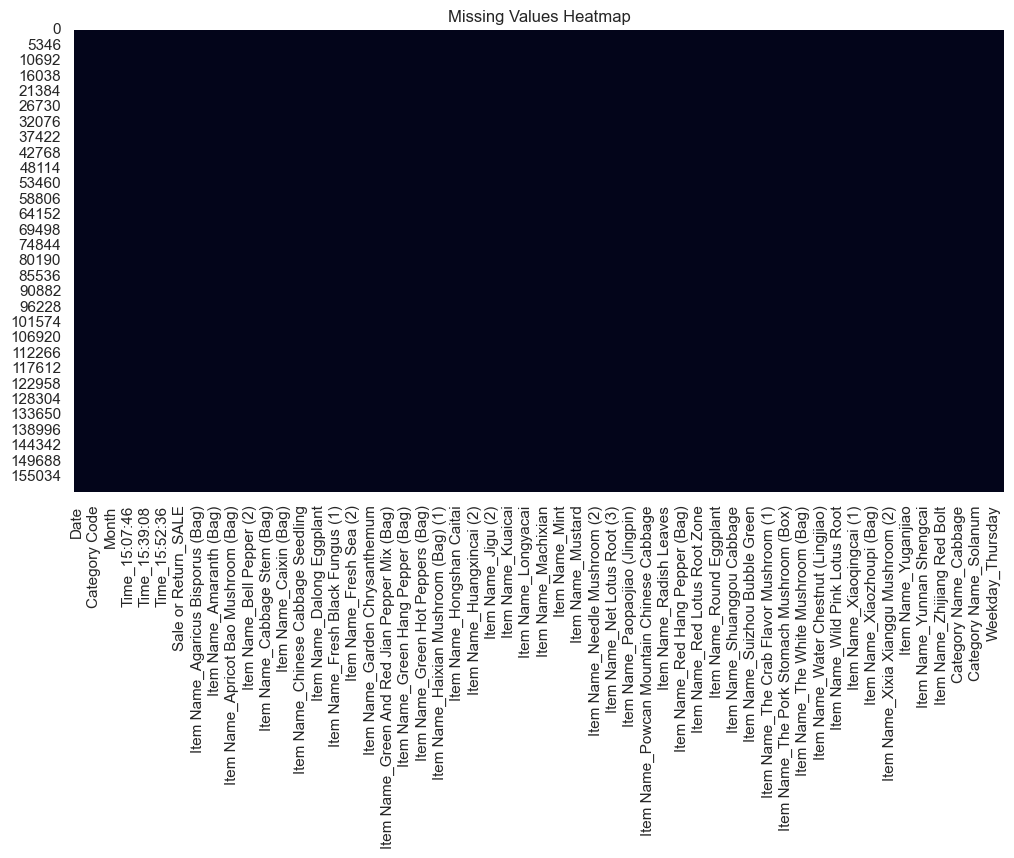

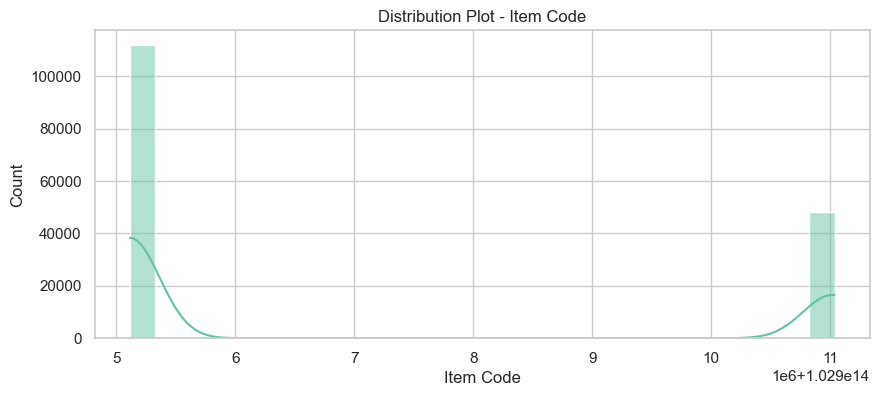

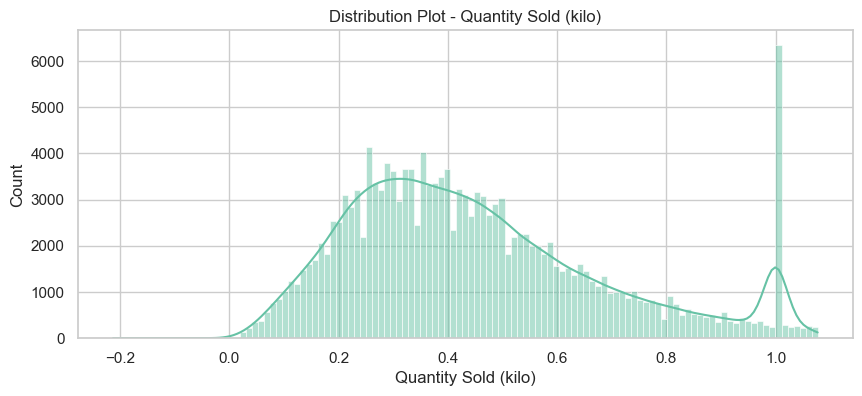

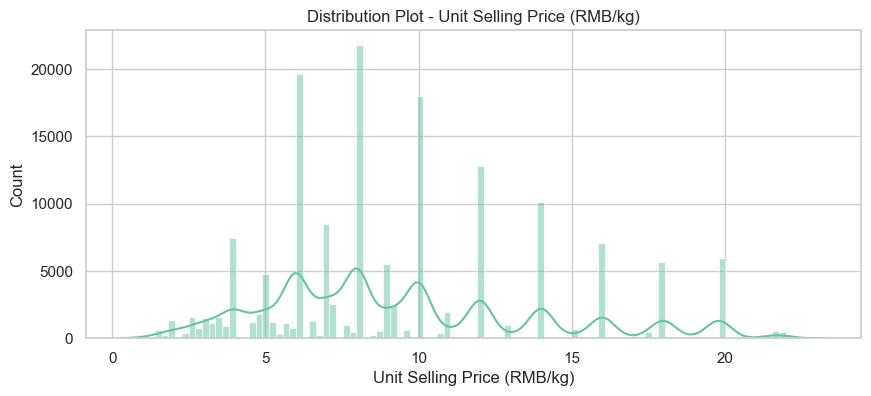

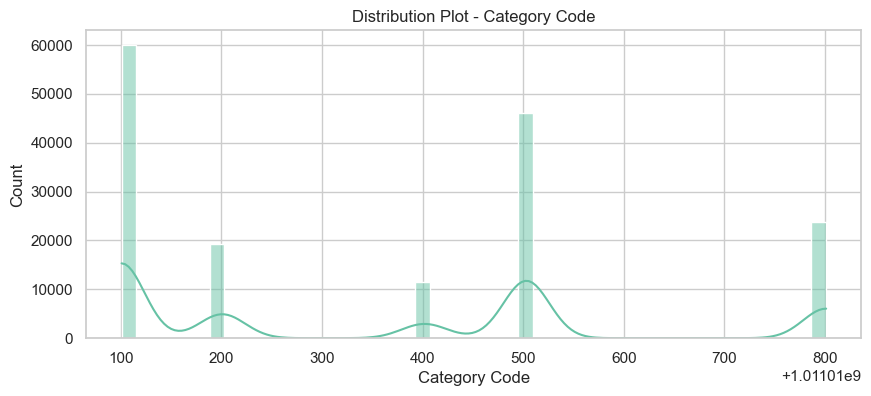

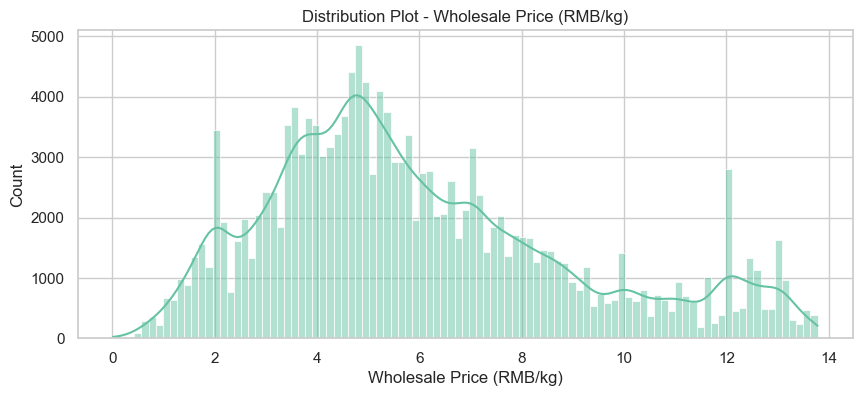

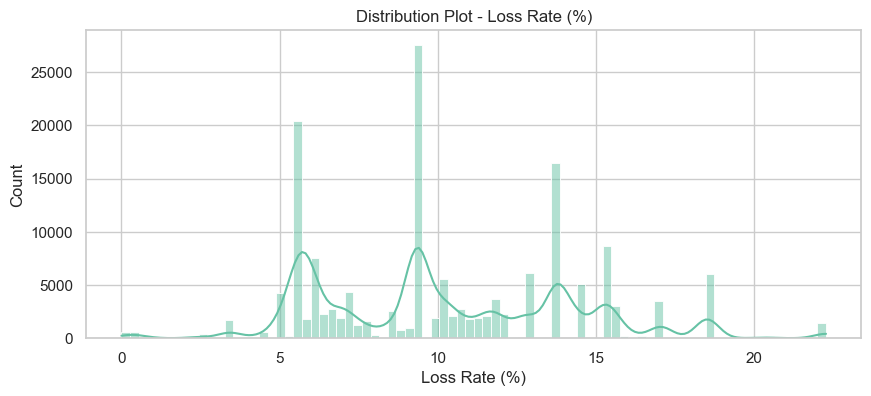

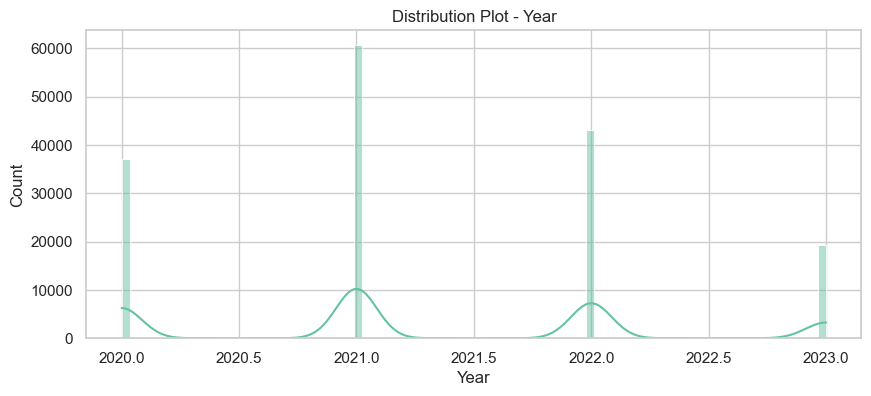

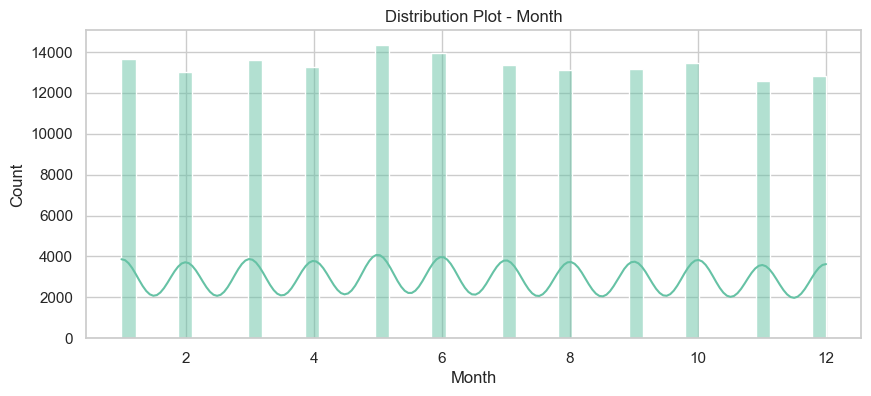

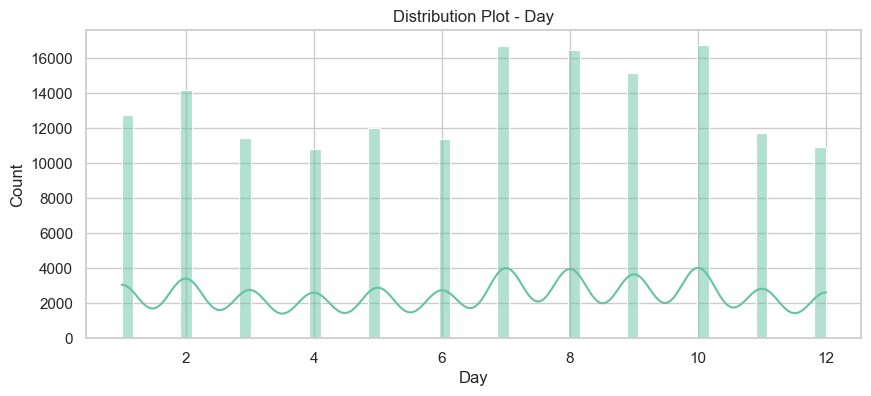

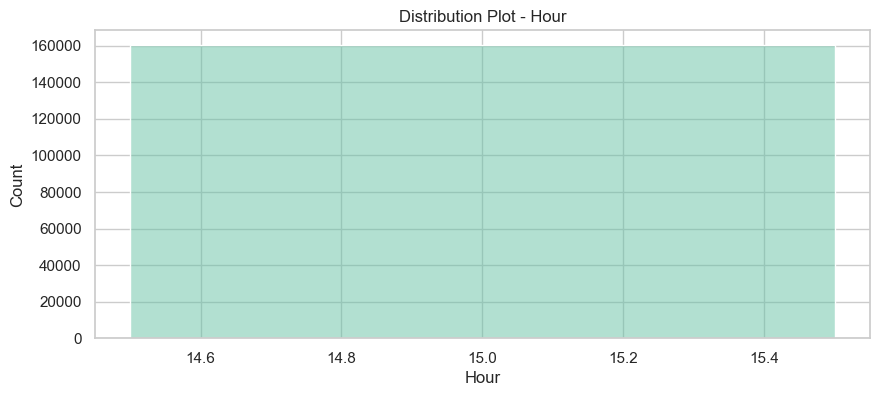

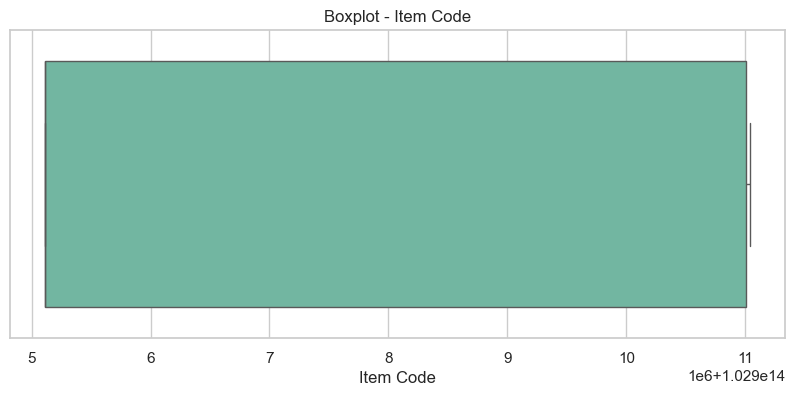

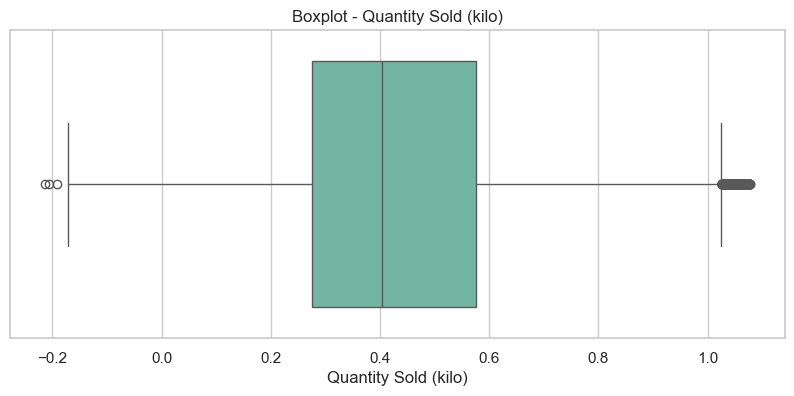

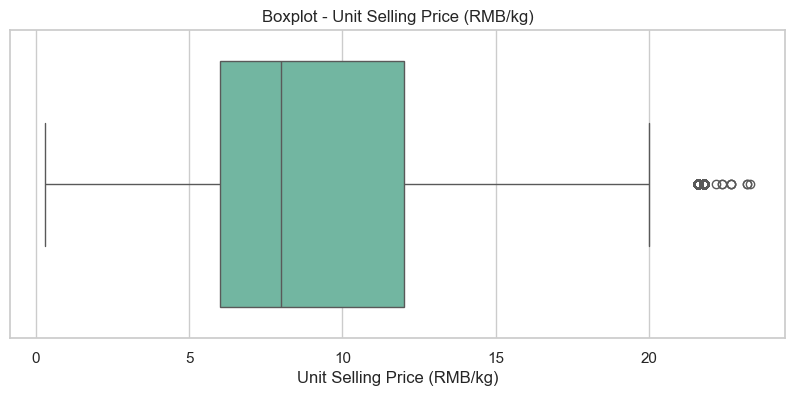

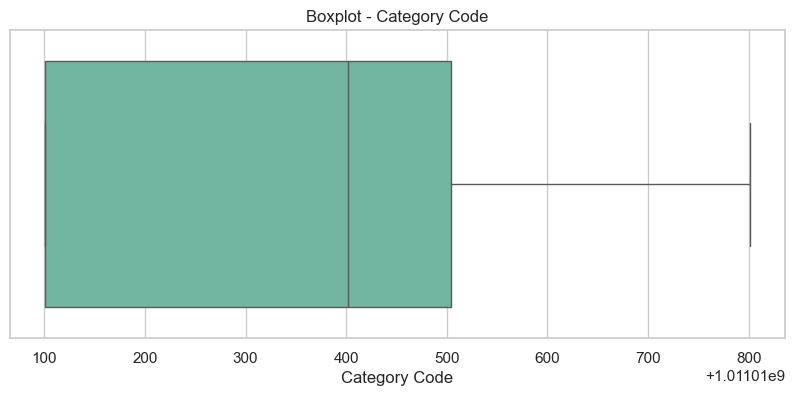

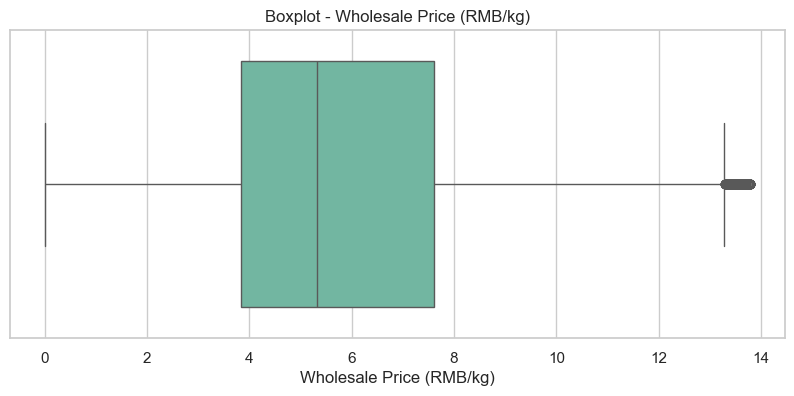

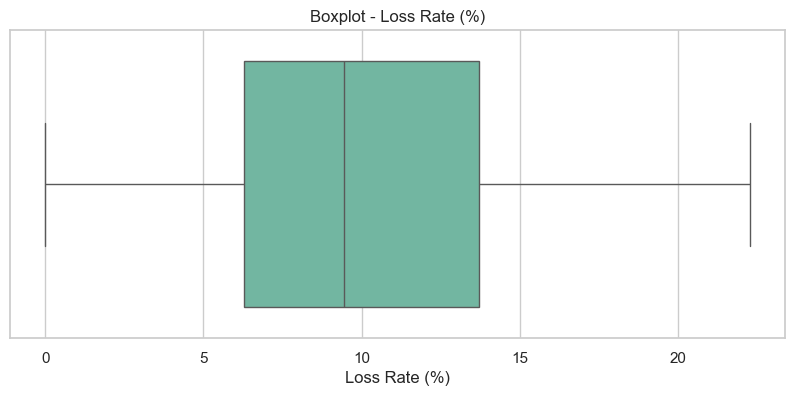

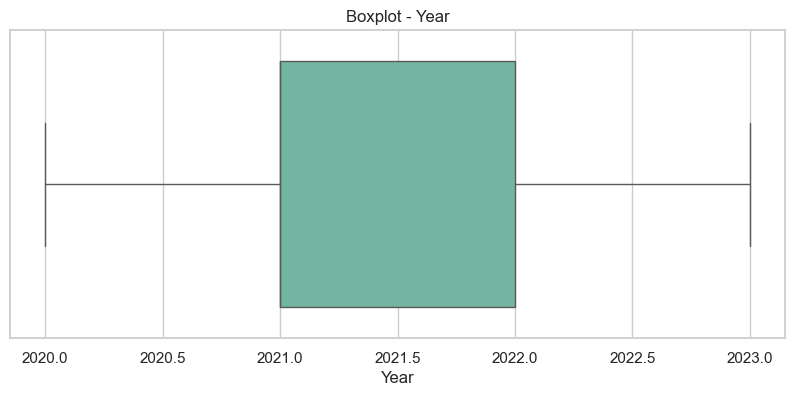

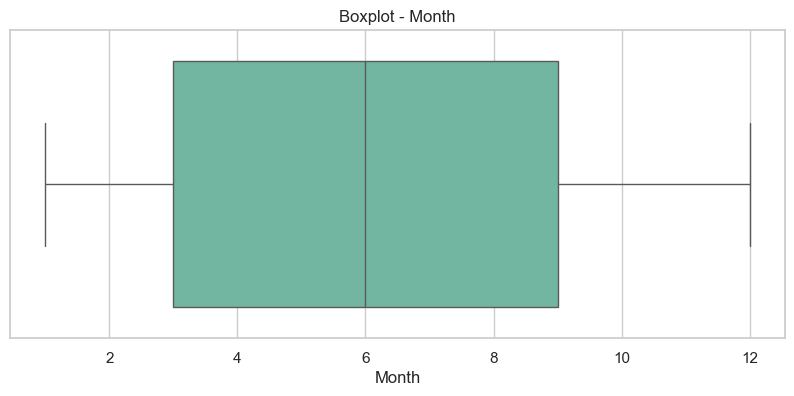

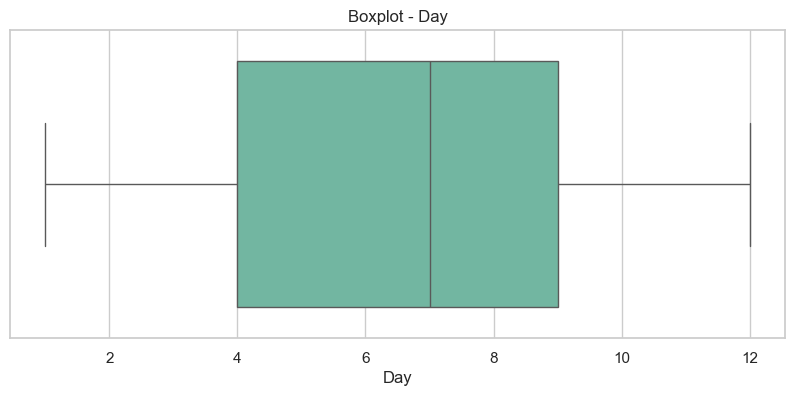

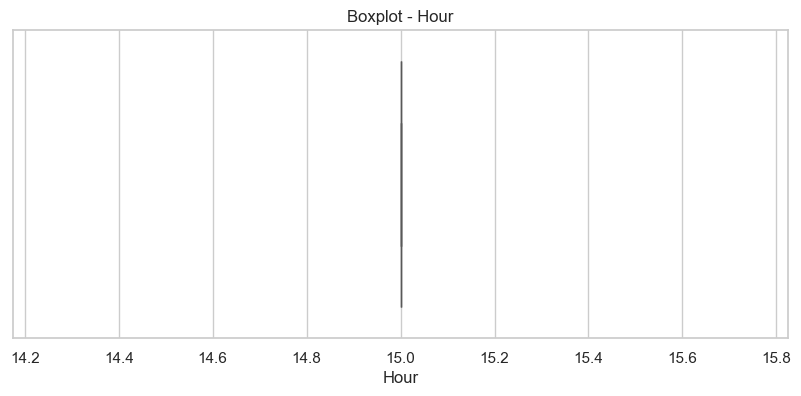

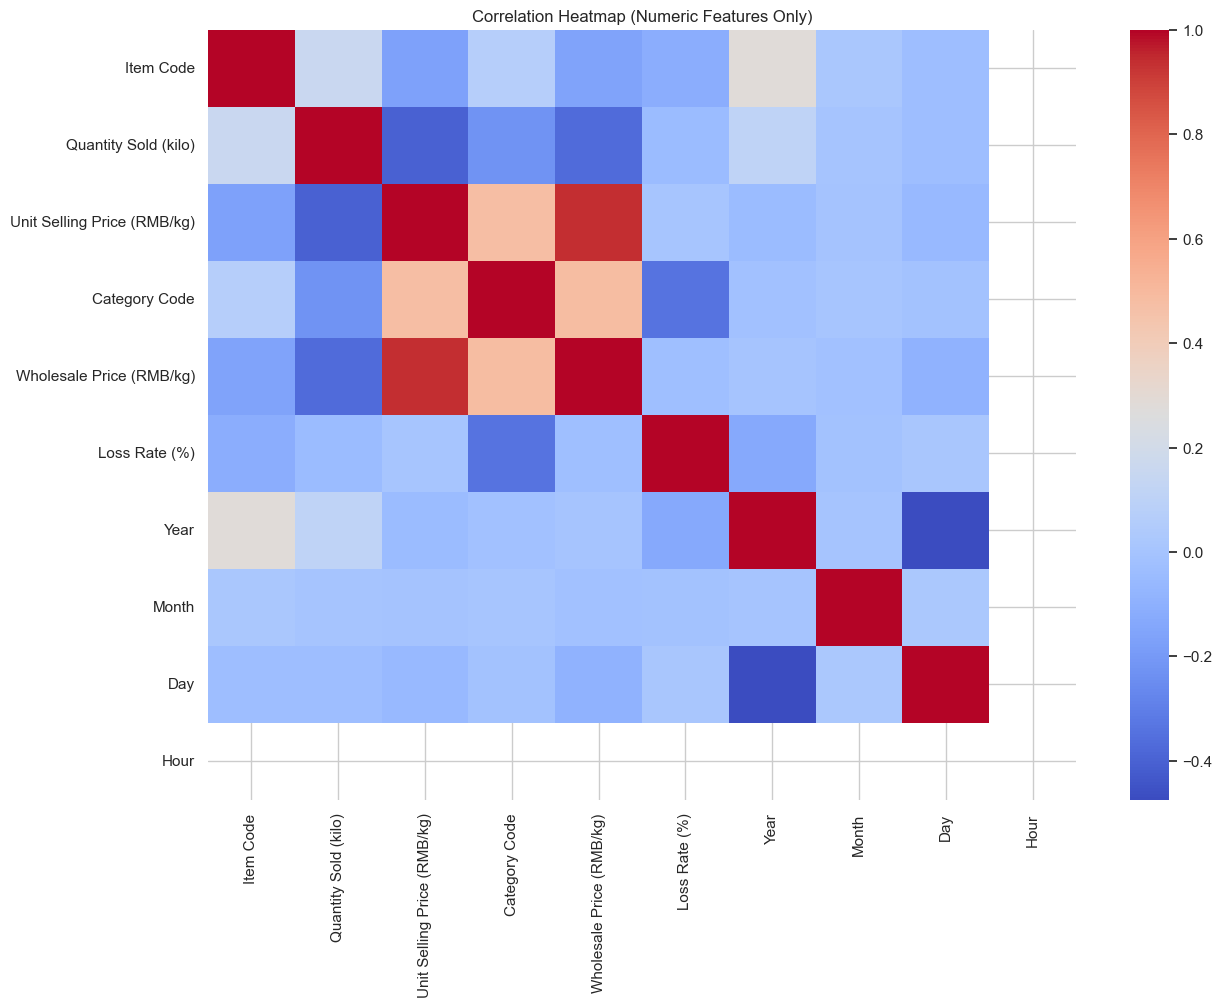

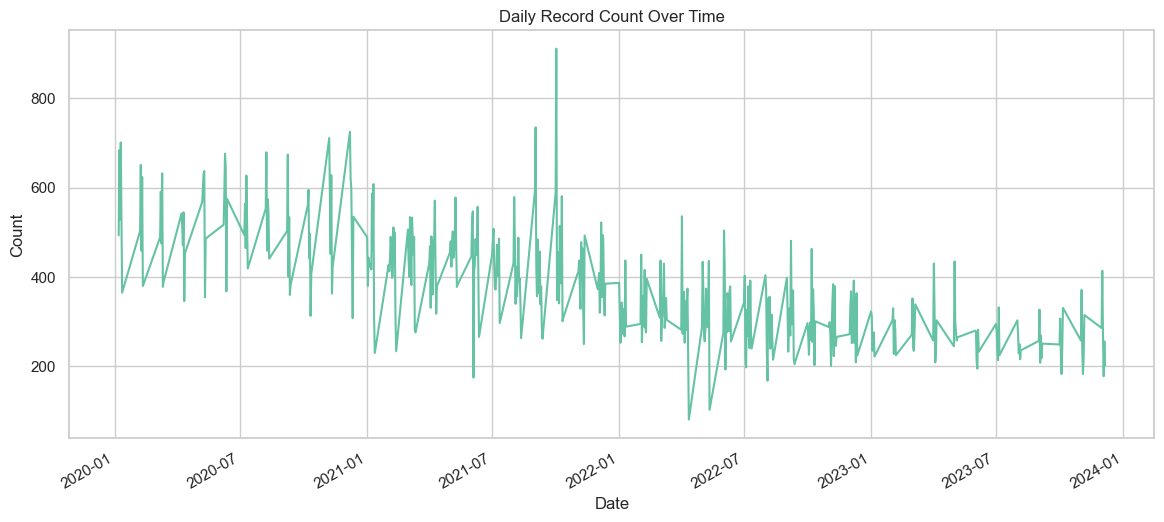

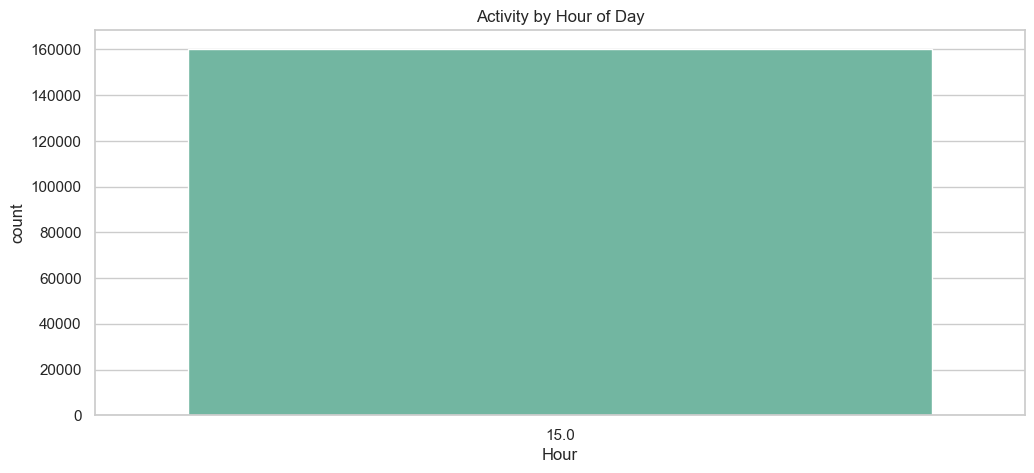

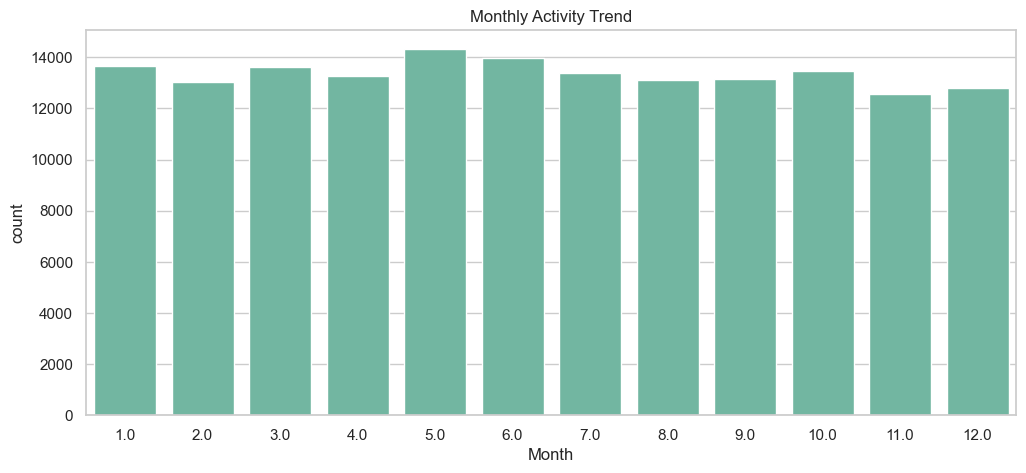

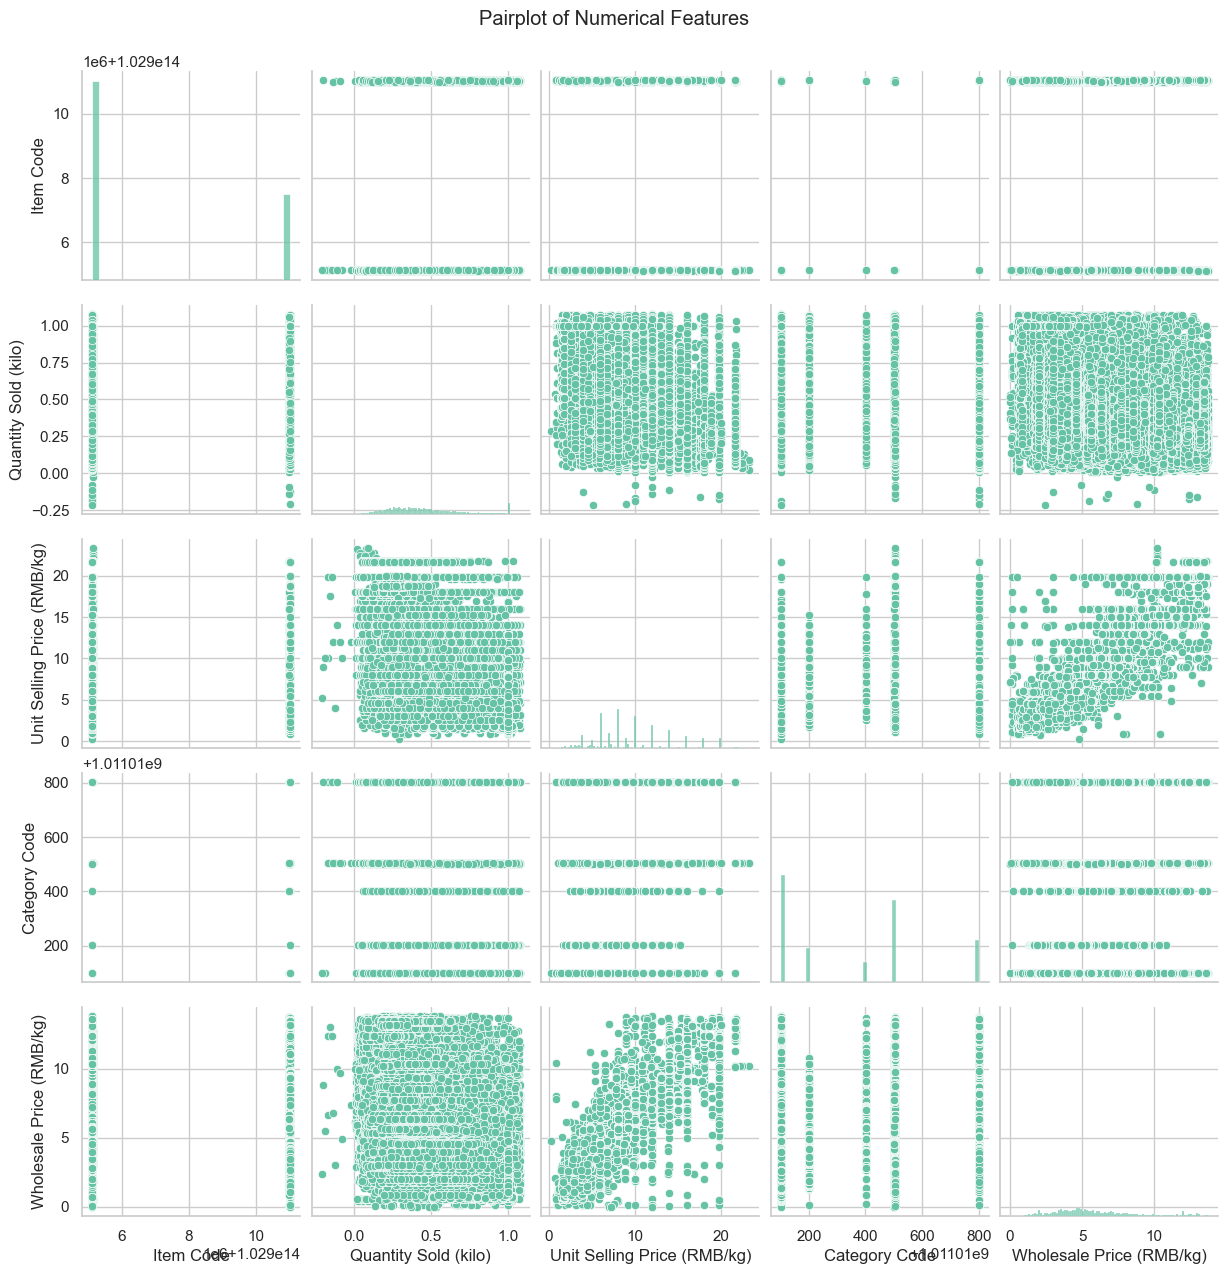

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("clean_dataset.csv")

sns.set(style="whitegrid", palette="Set2")

# =========================================================
# 1. Missing Values Heatmap
# =========================================================
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# =========================================================
# 2. Distribution Plots (Numeric Features)
# =========================================================
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution Plot - {col}")
    plt.xlabel(col)
    plt.show()

# =========================================================
# 3. Boxplots (Outlier Detection)
# =========================================================
for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
    plt.show()
    
# =========================================================
# 4. Correlation Heatmap (Numeric Only)
# =========================================================
numeric_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

# =========================================================
# 5. Time Series Plots (If Date Exists)
# =========================================================
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"])

    plt.figure(figsize=(14, 6))
    df.groupby("Date").size().plot()
    plt.title("Daily Record Count Over Time")
    plt.xlabel("Date")
    plt.ylabel("Count")
    plt.show()

# =========================================================
# 6. Hourly Activity Analysis (If Hour Exists)
# =========================================================
if "Hour" in df.columns:
    plt.figure(figsize=(12, 5))
    sns.countplot(x="Hour", data=df)
    plt.title("Activity by Hour of Day")
    plt.show()

# =========================================================
# 7. Monthly Trends (If Month Exists)
# =========================================================
if "Month" in df.columns:
    plt.figure(figsize=(12, 5))
    sns.countplot(x="Month", data=df)
    plt.title("Monthly Activity Trend")
    plt.show()

# =========================================================
# 8. Weekday Analysis (If Weekday Exists)
# =========================================================
if "Weekday" in df.columns:
    order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

    plt.figure(figsize=(12, 5))
    sns.countplot(x="Weekday", data=df, order=order)
    plt.title("Activity by Weekday")
    plt.show()

# =========================================================
# 9. Bar Charts for All Categorical Columns
# =========================================================
cat_cols = df.select_dtypes(include=["object"]).columns

for col in cat_cols:
    plt.figure(figsize=(12, 5))
    df[col].value_counts().head(20).plot(kind='bar')
    plt.title(f"Top Categories in {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# =========================================================
# 10. Pairplot (Top 5 Numeric Columns)
# =========================================================
top_num_cols = num_cols[:5]  # pick first 5 numeric columns
if len(top_num_cols) >= 2:
    sns.pairplot(df[top_num_cols])
    plt.suptitle("Pairplot of Numerical Features", y=1.02)
    plt.show()


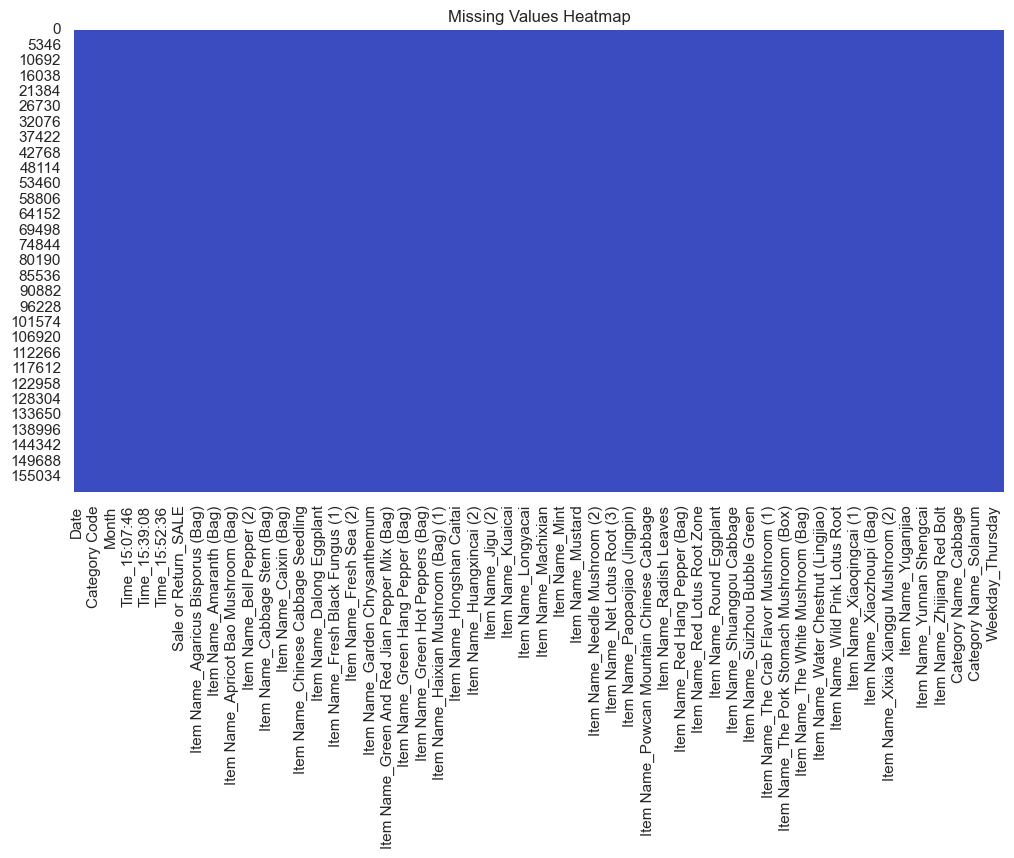

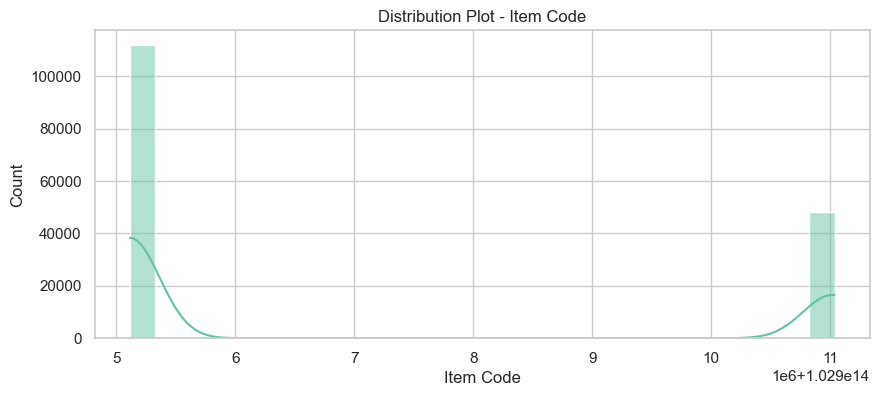

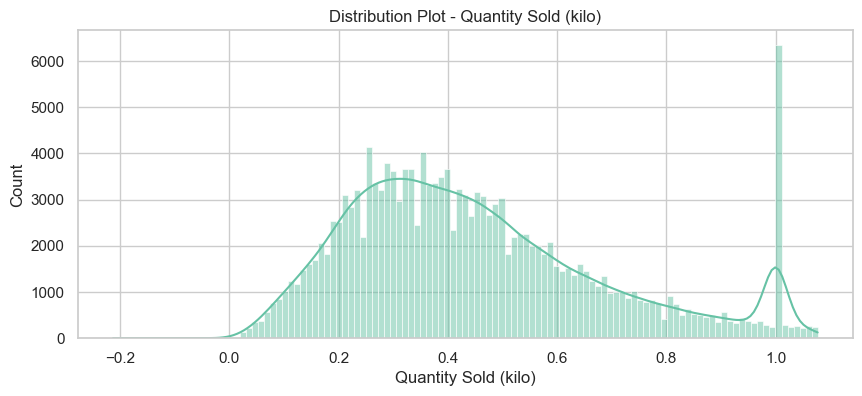

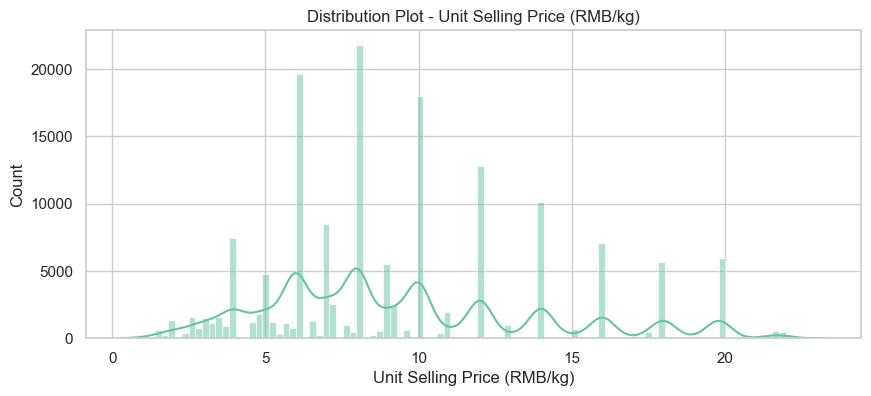

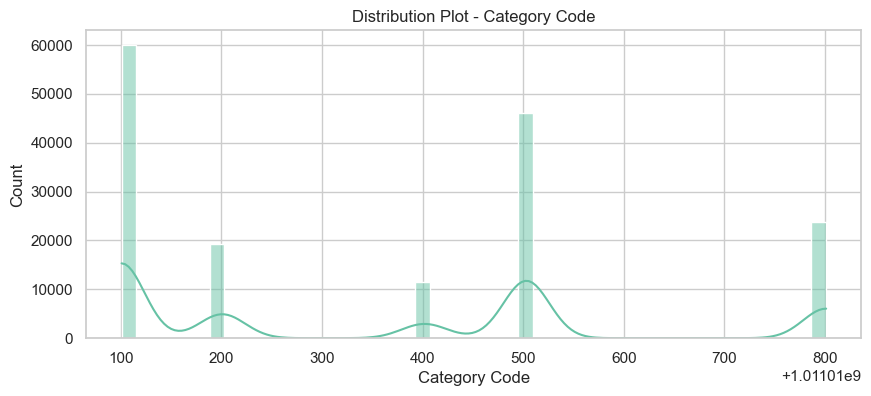

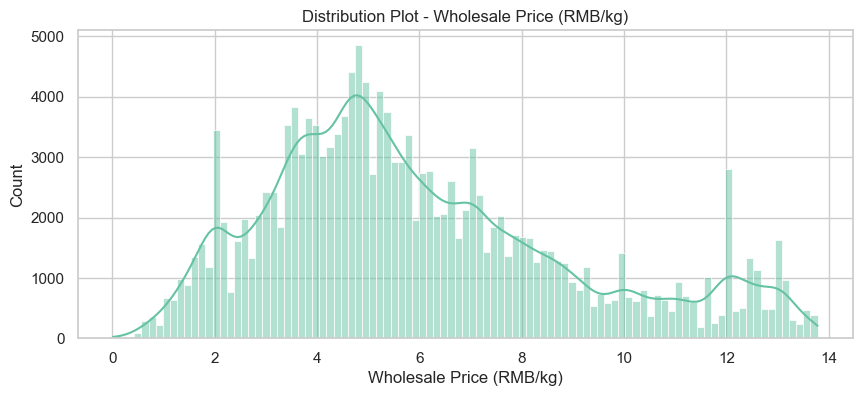

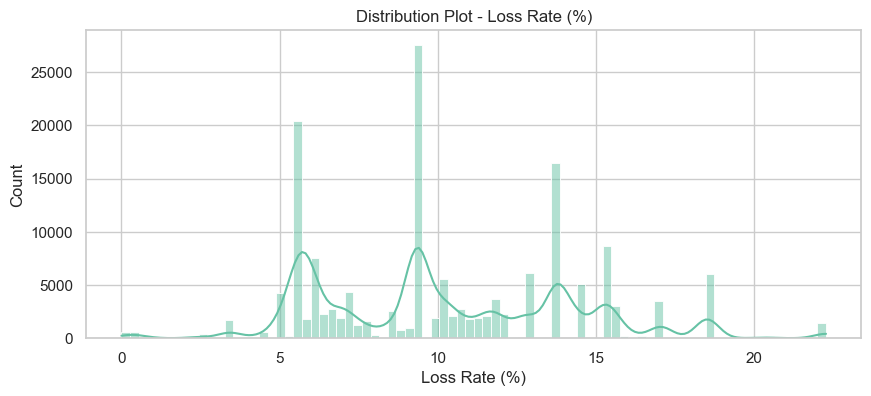

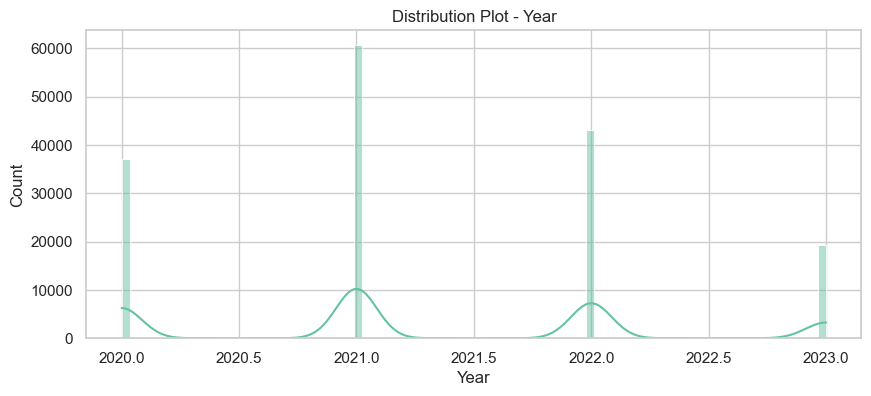

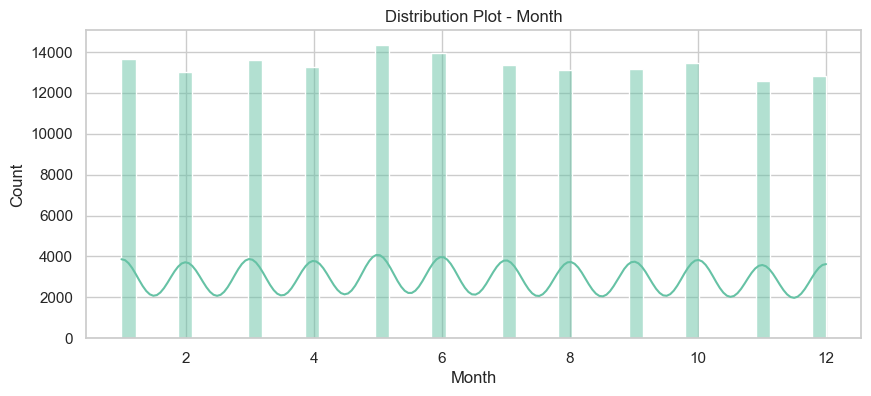

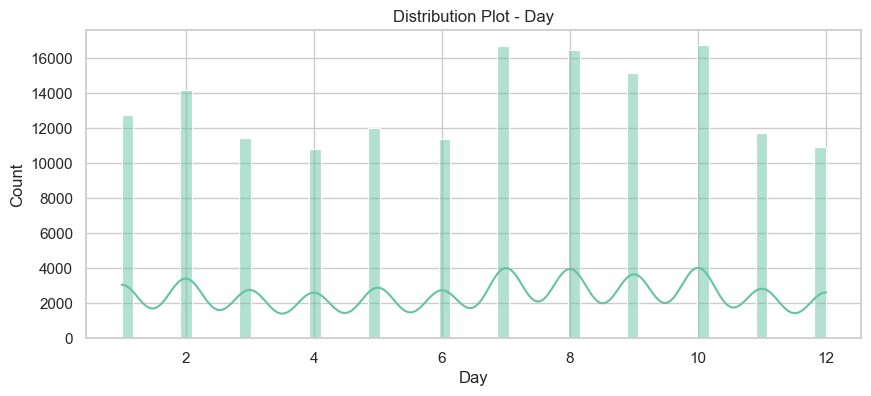

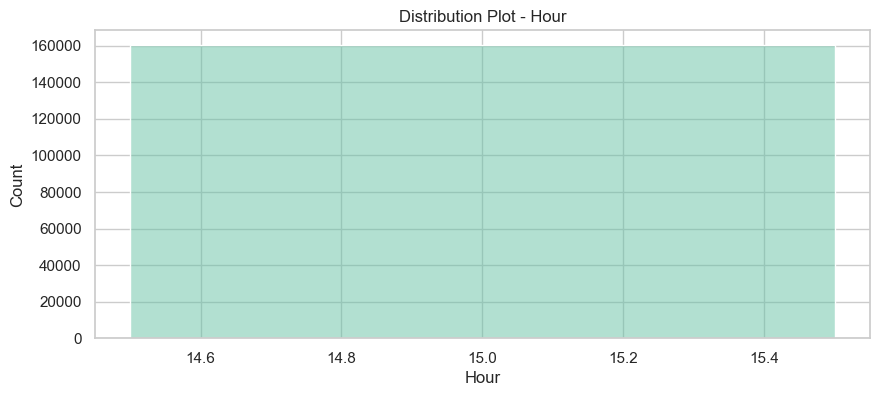

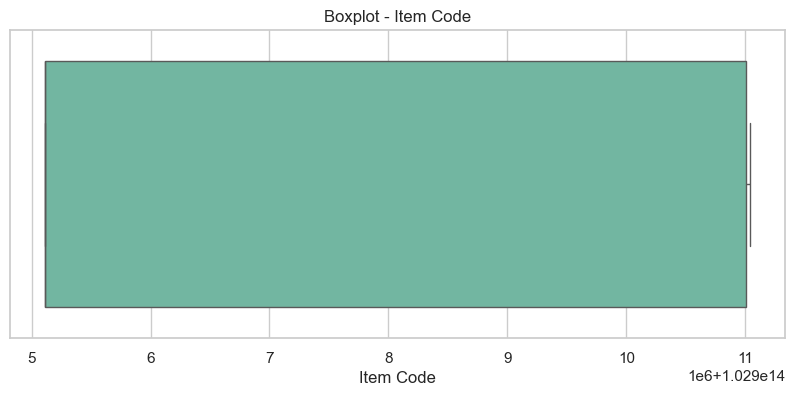

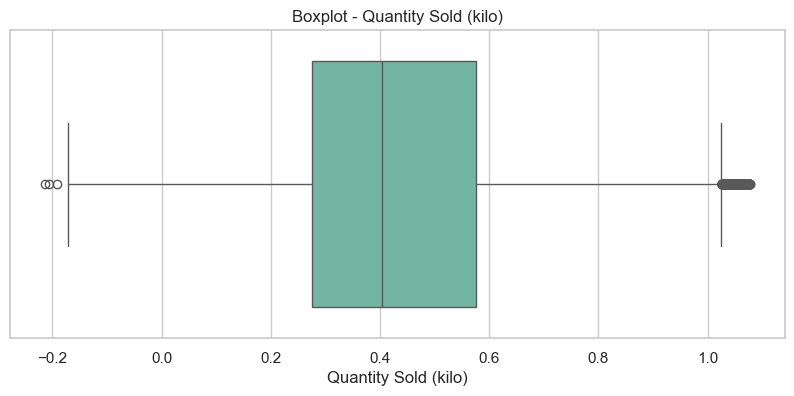

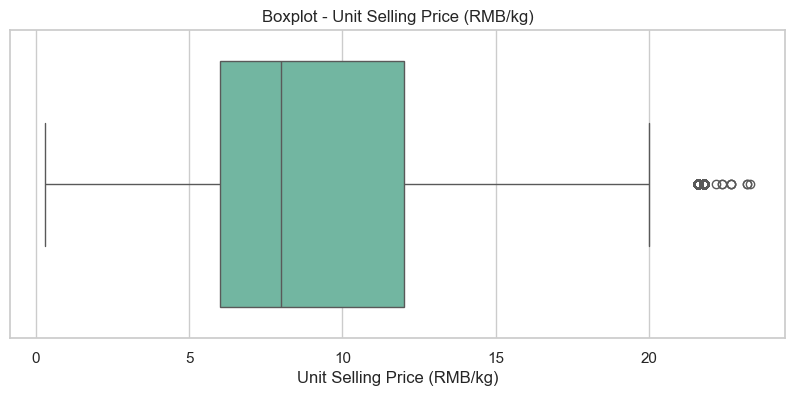

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("clean_dataset.csv")

sns.set(style="whitegrid", palette="Set2")

# =========================================================
# 1. Missing Values Heatmap
# =========================================================
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="coolwarm", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


# =========================================================
# 2. Distribution Plots (Numeric Features)
# =========================================================
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution Plot - {col}")
    plt.xlabel(col)
    plt.show()

# =========================================================
# 3. Boxplots (Outlier Detection)
# =========================================================
for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
    plt.show()
    
# =========================================================
# 4. Correlation Heatmap (Numeric Only with Values)
# =========================================================
numeric_df = df.select_dtypes(include=["int64", "float64"])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,          # <--- SHOW values inside heatmap
    fmt=".2f",           # <--- keep values readable (2 decimals)
    cmap="coolwarm",
    linewidths=0.5,
    square=True
)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

# =========================================================
# 5. Time Series Plots (If Date Exists)
# =========================================================
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"])

    plt.figure(figsize=(14, 6))
    df.groupby("Date").size().plot()
    plt.title("Daily Record Count Over Time")
    plt.xlabel("Date")
    plt.ylabel("Count")
    plt.show()

# =========================================================
# 6. Hourly Activity Analysis (If Hour Exists)
# =========================================================
if "Hour" in df.columns:
    plt.figure(figsize=(12, 5))
    sns.countplot(x="Hour", data=df)
    plt.title("Activity by Hour of Day")
    plt.show()

# =========================================================
# 7. Monthly Trends (If Month Exists)
# =========================================================
if "Month" in df.columns:
    plt.figure(figsize=(12, 5))
    sns.countplot(x="Month", data=df)
    plt.title("Monthly Activity Trend")
    plt.show()

# =========================================================
# 8. Weekday Analysis (If Weekday Exists)
# =========================================================
if "Weekday" in df.columns:
    order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

    plt.figure(figsize=(12, 5))
    sns.countplot(x="Weekday", data=df, order=order)
    plt.title("Activity by Weekday")
    plt.show()

# =========================================================
# 9. Bar Charts for All Categorical Columns
# =========================================================
cat_cols = df.select_dtypes(include=["object"]).columns

for col in cat_cols:
    plt.figure(figsize=(12, 5))
    df[col].value_counts().head(20).plot(kind='bar')
    plt.title(f"Top Categories in {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# =========================================================
# 10. Pairplot (Top 5 Numeric Columns)
# =========================================================
top_num_cols = num_cols[:5]  # pick first 5 numeric columns
if len(top_num_cols) >= 2:
    sns.pairplot(df[top_num_cols])
    plt.suptitle("Pairplot of Numerical Features", y=1.02)
    plt.show()


In [2]:
# ==========================================================
# 1. IMPORTS
# ==========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# ==========================================================
# 2. LOAD MERGED FILE
# ==========================================================
df = pd.read_csv("merged_master_data.csv")

# ==========================================================
# 3. BASIC INSPECTION
# ==========================================================
print("Shape:", df.shape)
print(df.head())
print(df.info())

# ==========================================================
# 4. PREPROCESSING PIPELINE
# ==========================================================

# ----------- 4.1 Handle Date & Time -------------
# Keep Time as requested
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Fill missing Time with mode (most common time)
if 'Time' in df.columns:
    df['Time'] = df['Time'].fillna(df['Time'].mode()[0])

# ----------- 4.2 Handling Missing Values -------------
# Fill numeric columns with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# ----------- 4.3 Encoding Categorical Data -------------
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# ----------- 4.4 Feature Scaling -------------
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("\nPreprocessing Completed Successfully!")

# Save processed file
df.to_csv("processed_data.csv", index=False)
print("Saved processed_data.csv")

# ==========================================================
# 5. ALL VISUALIZATIONS
# ==========================================================

# ---------- 5.1 Missing Value Heatmap ----------
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cbar=False, yticklabels=False)
plt.title("Missing Value Heatmap")
plt.show()

# ---------- 5.2 Distribution of Numerical Features ----------
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution Plot: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# ---------- 5.3 Count Plots for Categorical Columns ----------
for col in cat_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df[col])
    plt.title(f"Count Plot: {col}")
    plt.show()

# ---------- 5.4 Correlation Heatmap ----------
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ---------- 5.5 Outlier Detection Using Boxplots ----------
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
    plt.show()

# ---------- 5.6 Time-Series Trend (If numeric index exists) ----------
if 'Date' in df.columns:
    df_sorted = df.sort_values("Date")
    numeric_for_plot = num_cols[0]  # using first numeric column

    plt.figure(figsize=(12, 6))
    plt.plot(df_sorted['Date'], df_sorted[numeric_for_plot])
    plt.title(f"Trend Over Time: {numeric_for_plot}")
    plt.xlabel("Date")
    plt.ylabel(numeric_for_plot)
    plt.show()

print("All Visualizations Generated Successfully!")


FileNotFoundError: [Errno 2] No such file or directory: 'merged_master_data.csv'